In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# 1. Data Voorbereiding
# Laad de data
X_train = pd.read_csv("alle_kranten_X_train.csv")  # Laad trainingskenmerken
X_test = pd.read_csv("alle_kranten_X_test.csv")  # Laad testkenmerken
y_train = pd.read_csv("alle_kranten_y_train.csv")  # Laad trainingsdoelvariabele
y_test = pd.read_csv("alle_kranten_y_test.csv")  # Laad testdoelvariabele

# Controleer de vormen van de data
print(f"Train X shape: {X_train.shape}, Train y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}, Test y shape: {y_test.shape}")

# Log-transformatie van de doelvariabele
y_train_log = np.log1p(y_train.squeeze())  # Gebruik log1p om dimensies te verwijderen
y_test_log = np.log1p(y_test.squeeze())  # Gebruik log1p om dimensies te verwijderen

# Schalen van de kenmerken
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Controleer de geschaalde data
print(f"X_train_scaled shape: {X_train_scaled.shape}, y_train_log shape: {y_train_log.shape}")

# 2. Bouw het Neuraal Netwerk Model met 5 lagen
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Inputlaag
    Dense(512, activation='relu'),  # Verborgen laag 1
    Dropout(0.3),  # Dropout
    Dense(256, activation='relu'),  # Verborgen laag 2
    Dropout(0.3),  # Dropout
    Dense(128, activation='relu'),  # Verborgen laag 3
    Dropout(0.3),  # Dropout
    Dense(64, activation='relu'),  # Verborgen laag 4
    Dense(32, activation='relu'),  # Verborgen laag 5
    Dense(1)  # Outputlaag (regressie)
])

# Compileer het model
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(), metrics=['mae', 'mse'])

# 3. Early Stopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 4. Train het Model
history = model.fit(
    X_train_scaled, y_train_log,
    validation_data=(X_test_scaled, y_test_log),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Train X shape: (170772, 177), Train y shape: (170772, 1)
Test X shape: (42694, 177), Test y shape: (42694, 1)
X_train_scaled shape: (170772, 177), y_train_log shape: (170772,)
Epoch 1/50
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 50s 9ms/step - loss: 0.2654 - mae: 0.5736 - mse: 0.6955 - val_loss: 0.1745 - val_mae: 0.4470 - val_mse: 0.3861
Epoch 2/50
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - loss: 0.1714 - mae: 0.4445 - mse: 0.3777 - val_loss: 0.1702 - val_mae: 0.4375 - val_mse: 0.3770
Epoch 3/50
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 0.1658 - mae: 0.4364 - mse: 0.3644 - val_loss: 0.1705 - val_mae: 0.4422 - val_mse: 0.3745
Epoch 4/50
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - loss: 0.1635 - mae: 0.4331 - mse: 0.3590 - val_loss: 0.1669 - val_mae: 0.4373 - val_mse: 0.3660
Epoch 5/50
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 0.1620 - mae: 0.4301 - mse: 0.3555 - val_loss: 0.1637 - val_mae: 0.4364 - val_mse: 0.3588
Epoch 6/50
5337/5337 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - lo

In [5]:
# ================================
# 5. Evaluatie
# ================================

# Voorspellingen maken
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Inverse log-transformatie
y_test_original = np.expm1(y_test_log)  # Inverse log-transformatie van de testdoelvariabele

# Bereken RMSE en R²
rmse = sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


1335/1335 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
RMSE: 46.84134536541212
R²: 0.24675971381639283


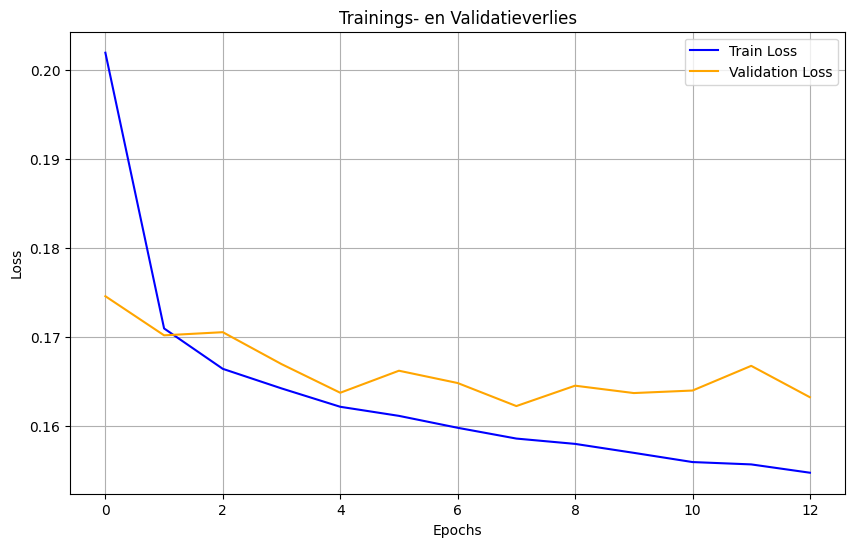

In [7]:
# ================================
# 6. Visualisaties
# ================================
import matplotlib.pyplot as plt


# Plot trainingsgeschiedenis (Train Loss vs Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Trainings- en Validatieverlies')
plt.legend()
plt.grid()
plt.show()

In [8]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# 1. Data Voorbereiding
X_train = pd.read_csv("alle_kranten_X_train.csv")
X_test = pd.read_csv("alle_kranten_X_test.csv")
y_train = pd.read_csv("alle_kranten_y_train.csv")
y_test = pd.read_csv("alle_kranten_y_test.csv")

y_train_log = np.log1p(y_train.squeeze())
y_test_log = np.log1p(y_test.squeeze())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Defineer het Model
def create_model(neurons_1=128, neurons_2=64, neurons_3=32, neurons_4=16, neurons_5=8,
                 dropout_rate=0.3, learning_rate=0.001, activation='relu'):
    model = Sequential([
        Input(shape=(X_train_scaled.shape[1],)),
        Dense(neurons_1, activation=activation),
        Dropout(dropout_rate),
        Dense(neurons_2, activation=activation),
        Dropout(dropout_rate),
        Dense(neurons_3, activation=activation),
        Dense(neurons_4, activation=activation),
        Dense(neurons_5, activation=activation),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=Huber(), metrics=['mae', 'mse'])
    return model

# Wrapper voor RandomizedSearchCV
model = KerasRegressor(model=create_model, verbose=0)

# 3. Hyperparameterruimte
param_distributions = {
    'model__neurons_1': [128, 256, 512],
    'model__neurons_2': [64, 128, 256],
    'model__neurons_3': [32, 64],
    'model__neurons_4': [16, 32],
    'model__neurons_5': [8, 16],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [20, 50]
}

# 4. RandomizedSearchCV instellen
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 5. Run RandomizedSearchCV
random_search.fit(X_train_scaled, y_train_log)


# 6. Print Beste Parameters
print(f"Beste Parameters: {random_search.best_params_}")
print(f"Beste Score: {random_search.best_score_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Beste Parameters: {'model__neurons_5': 8, 'model__neurons_4': 16, 'model__neurons_3': 64, 'model__neurons_2': 64, 'model__neurons_1': 256, 'model__learning_rate': 0.0001, 'model__dropout_rate': 0.2, 'model__activation': 'tanh', 'epochs': 20, 'batch_size': 16}
Beste Score: -0.345923218886206


In [11]:
1# ------------------------------------------------------------------------
# 5. Train and Evaluate the Best Model
# ------------------------------------------------------------------------
# Retrieve the best hyperparameters
best_params = random_search.best_params_

# Train the best model using the optimal hyperparameters
best_model = create_model(
    neurons_1=best_params['model__neurons_1'],
    neurons_2=best_params['model__neurons_2'],
    neurons_3=best_params['model__neurons_3'],
    neurons_4=best_params['model__neurons_4'],
    neurons_5=best_params['model__neurons_5'],
    dropout_rate=best_params['model__dropout_rate'],
    learning_rate=best_params['model__learning_rate'],
    activation=best_params['model__activation']
)

history = best_model.fit(
    X_train_scaled, y_train_log,
    validation_data=(X_test_scaled, y_test_log),
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=1
)

# Evaluate the best model
y_pred_log = best_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # Reverse log-transformation
y_test_original = np.expm1(y_test_log)  # Reverse log-transformation

best_rmse = sqrt(mean_squared_error(y_test_original, y_pred))
best_r2 = r2_score(y_test_original, y_pred)

print(f"Best Model - RMSE: {best_rmse}")
print(f"Best Model - R²: {best_r2}")

Epoch 1/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - loss: 0.5251 - mae: 0.8508 - mse: 1.8491 - val_loss: 0.1764 - val_mae: 0.4508 - val_mse: 0.4078
Epoch 2/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 0.1753 - mae: 0.4507 - mse: 0.3995 - val_loss: 0.1688 - val_mae: 0.4421 - val_mse: 0.3704
Epoch 3/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 0.1674 - mae: 0.4391 - mse: 0.3671 - val_loss: 0.1659 - val_mae: 0.4351 - val_mse: 0.3659
Epoch 4/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.1640 - mae: 0.4347 - mse: 0.3597 - val_loss: 0.1648 - val_mae: 0.4330 - val_mse: 0.3634
Epoch 5/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.1622 - mae: 0.4308 - mse: 0.3571 - val_loss: 0.1654 - val_mae: 0.4370 - val_mse: 0.3627
Epoch 6/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.1613 - mae: 0.4295 - mse: 0.3539 - val_loss: 0.1631 - val_mae: 0.4317 - val_mse: 0.3597
Epoch 7/20
10674/10674 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.157

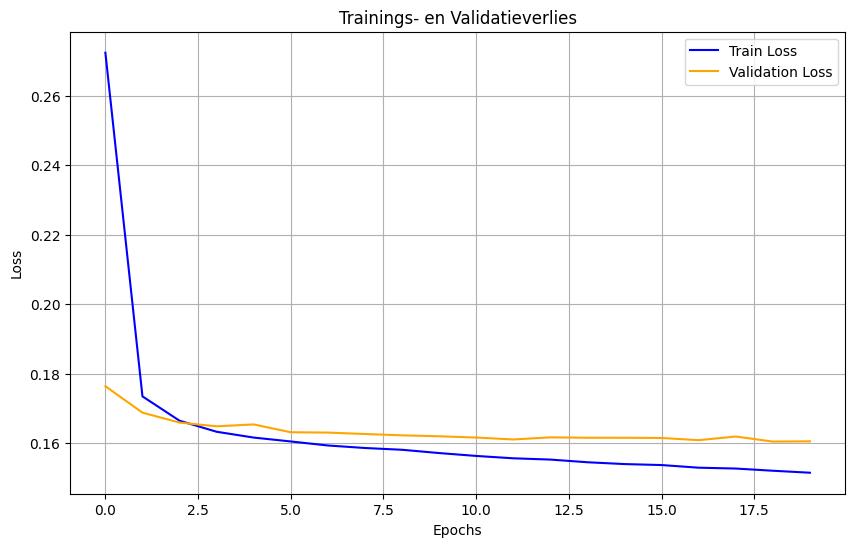

In [12]:
# ================================
# 6. Visualisaties
# ================================
import matplotlib.pyplot as plt


# Plot trainingsgeschiedenis (Train Loss vs Validation Loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Trainings- en Validatieverlies')
plt.legend()
plt.grid()
plt.show()